In [61]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import io, transform
import open3d as o3d
import h5py

In [2]:
mainpath = r'D:\cherepashkin1\598test\plot_output\e057\028'.replace('\\','/')

In [5]:
os.path.isfile(mainpath)

False

In [6]:
mainpath

'D:/cherepashkin1/598test/plot_output/e057/028'

In [7]:
mainpath

'D:/cherepashkin1/598test/plot_output/e057/028'

In [8]:
exec(open(os.path.join('D:/circles/finetune_test/experiments/e057/cnet.py')).read())

In [ ]:
hidden_dim = 

In [9]:
hidden_dim = np.hstack((np.repeat(32, 1),1500))
chidden_dim = np.hstack((96,128,np.repeat(256, 3)))
kernel_sizes = np.hstack((7,np.repeat(3, 5)))

In [10]:
enim = 1
rescalef = 256
original_w = 1800
original_h = 1000

In [13]:
model = CNet(hidden_dim, chidden_dim, kernel_sizes,
            enim, rescalef,
            int(rescalef*original_w/original_h), True)
model.load_state_dict(torch.load(os.path.join(mainpath,'model')))
model.eval()

RuntimeError: Error(s) in loading state_dict for CNet:
	Missing key(s) in state_dict: "conv0.weight", "conv0.bias", "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "bn0.weight", "bn0.bias", "bn0.running_mean", "bn0.running_var", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn2.weight", "bn2.bias", "bn2.running_mean", "bn2.running_var", "bn3.weight", "bn3.bias", "bn3.running_mean", "bn3.running_var", "layers.0.weight", "layers.0.bias", "layers.1.weight", "layers.1.bias". 
	Unexpected key(s) in state_dict: "module.conv0.weight", "module.conv0.bias", "module.conv1.weight", "module.conv1.bias", "module.conv2.weight", "module.conv2.bias", "module.conv3.weight", "module.conv3.bias", "module.conv4.weight", "module.conv4.bias", "module.bn0.weight", "module.bn0.bias", "module.bn0.running_mean", "module.bn0.running_var", "module.bn0.num_batches_tracked", "module.bn1.weight", "module.bn1.bias", "module.bn1.running_mean", "module.bn1.running_var", "module.bn1.num_batches_tracked", "module.bn2.weight", "module.bn2.bias", "module.bn2.running_mean", "module.bn2.running_var", "module.bn2.num_batches_tracked", "module.bn3.weight", "module.bn3.bias", "module.bn3.running_mean", "module.bn3.running_var", "module.bn3.num_batches_tracked", "module.layers.0.weight", "module.layers.0.bias", "module.layers.1.weight", "module.layers.1.bias". 

In [16]:
# original saved file with DataParallel
state_dict = torch.load(os.path.join(mainpath,'model'))
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [20]:
curimg = np.asarray(io.imread('D:/cherepashkin1/phenoseed/598/1484760/1500735/rotation_000.tif'), dtype=np.single)

In [30]:
from torchvision import transforms

In [33]:
curimg2 = transform.resize(curimg,(256, int(1.8*256)))

In [34]:
inputs = torch.unsqueeze(torch.unsqueeze(torch.Tensor(curimg2), axis=0), axis=0)

In [39]:
outputs = model(inputs)

In [41]:
p = outputs.detach().numpy()

In [43]:
p1 = np.reshape(p,(3,500))

In [46]:
vox2mm = 0.05

In [77]:
p*=vox2mm

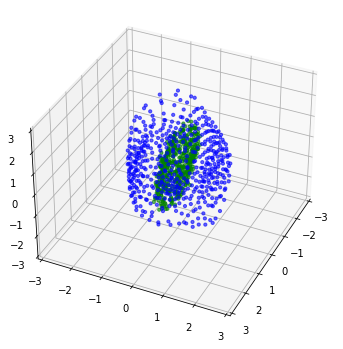

In [78]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1, 0+1, projection='3d')
# p0 = np.reshape(ot0,(3,500))
# p1 = np.reshape(gt0,(3,500))
# ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
# ax.scatter(p[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="b", alpha=0.6)
ax.view_init(elev=35, azim=25)
ax_lim = 60*vox2mm
ax.set_xlim(-ax_lim, ax_lim)
ax.set_ylim(-ax_lim, ax_lim)
ax.set_zlim(-ax_lim, ax_lim)
plt.show()

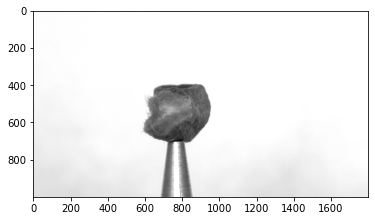

In [50]:
plt.imshow(curimg, cmap='gray')

In [52]:
pcd = np.asarray(open3d.io.read_point_cloud('D:/cherepashkin1/phenoseed/598/1484760/1500735_Surface.ply').points)

In [53]:
pcd.shape

(32321, 3)

In [93]:
#pcd from original ply
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(pcd)
o3d.visualization.draw_geometries([pcd3])

In [92]:
#pcd from model output
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p1.transpose())
o3d.visualization.draw_geometries([pcd3])

In [91]:
# pcd from F_N
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p.transpose())
o3d.visualization.draw_geometries([pcd3])

In [97]:
p2 = np.concatenate((2*p1,p),axis = 1)

In [98]:
p2.shape

(3, 1000)

In [99]:
pcd3 = o3d.geometry.PointCloud()
pcd3.points = o3d.utility.Vector3dVector(p2.transpose())
o3d.visualization.draw_geometries([pcd3])

In [62]:
F_Nw = np.array(h5py.File('D:/cherepashkin1/phenoseed_csv/598csv9_F_N.h5','r').get('dataset'))

In [65]:
with open('D:/cherepashkin1/phenoseed_csv/598csv9_F_N_file_names.txt','r') as f:
    F_N_names = f.readlines()
F_N_names = [c.replace('\n','') for c in F_N_names]

In [66]:
indices = []
# for path in pathl:
[i for i, s in enumerate(F_N_names) if '1484760_1500735' in s][0]

5152

In [67]:
F_N = F_Nw[5152,:]

In [68]:
Y_N = np.genfromtxt('D:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [69]:
Y_N2 = Y_N[:500,:]

In [70]:
bX = np.genfromtxt('D:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter=',')

In [73]:
dirs = bX[:2,:].transpose()

In [74]:
far = np.matmul(Y_N2, F_N)
p = np.zeros([3,500])
p[0,:]=far*np.cos(dirs[:,0])*np.sin(dirs[:,1])
p[1,:]=far*np.sin(dirs[:,0])*np.sin(dirs[:,1])
p[2,:]=far*np.cos(dirs[:,1])

In [100]:
x = torch.zeros([15,3,500])

In [104]:
torch.norm(x,dim=1).shape

torch.Size([15, 500])

In [110]:
for name, param in model.named_parameters():
    if name == 'layers.1.weight':
        print(name)
        w = param
    if name == 'layers.1.bias':
        print(name)
        b = param

layers.1.weight
layers.1.bias


In [111]:
w.shape

torch.Size([1500, 32])

In [113]:
w1 = w.detach().numpy()

In [114]:
w1.shape

(1500, 32)

In [112]:
b.shape

torch.Size([1500])

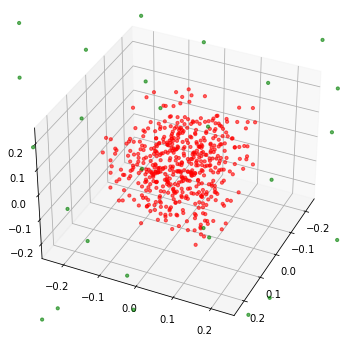

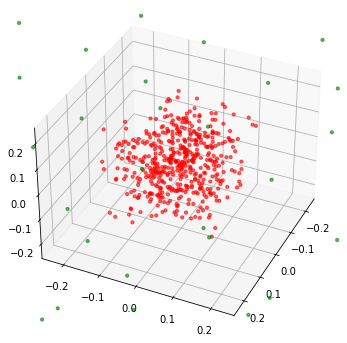

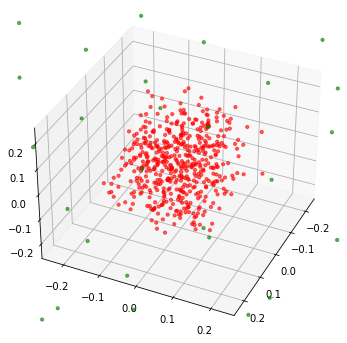

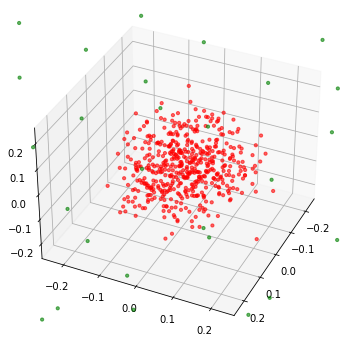

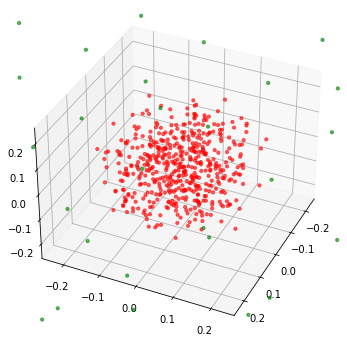

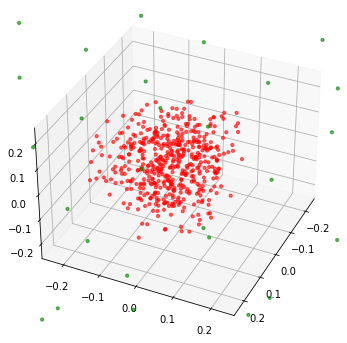

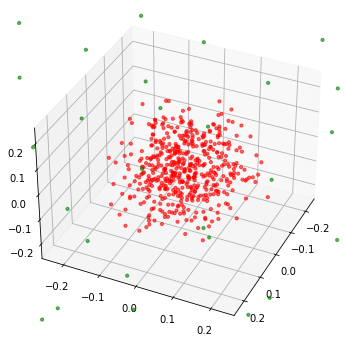

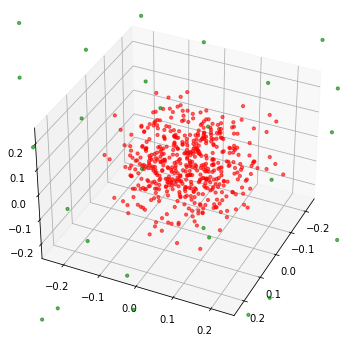

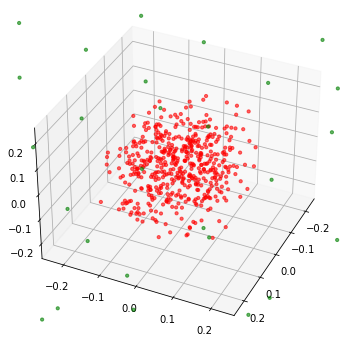

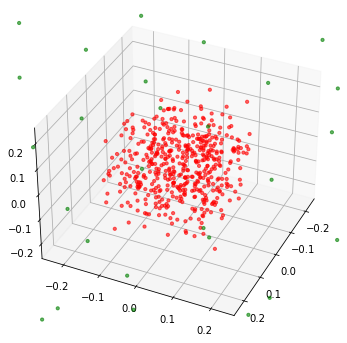

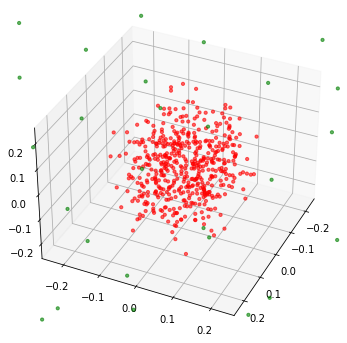

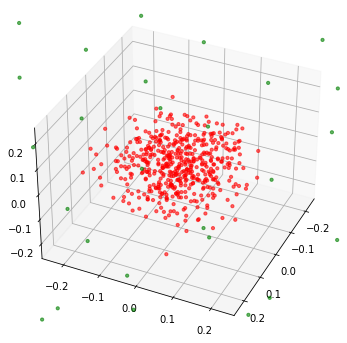

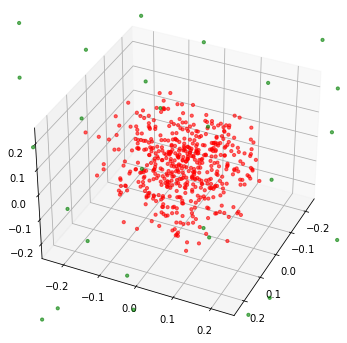

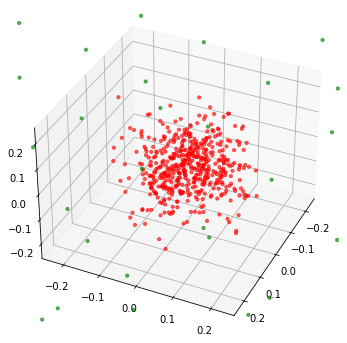

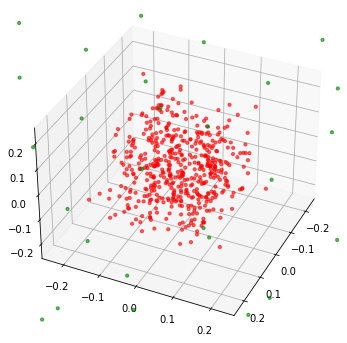

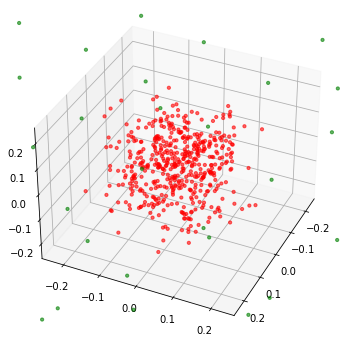

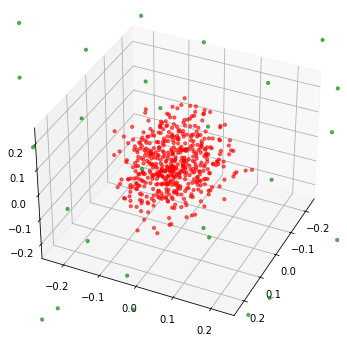

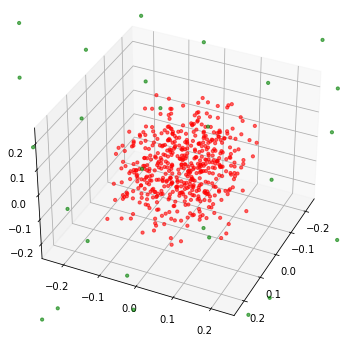

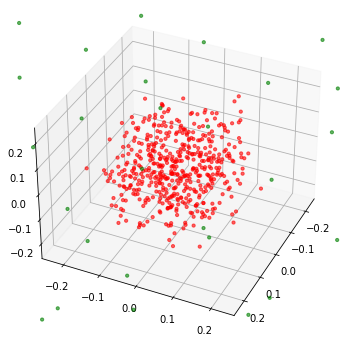

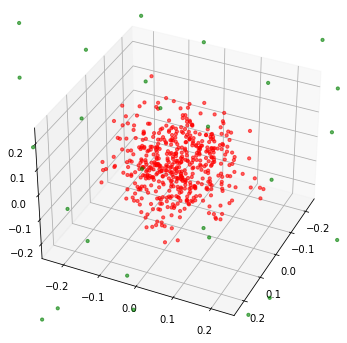

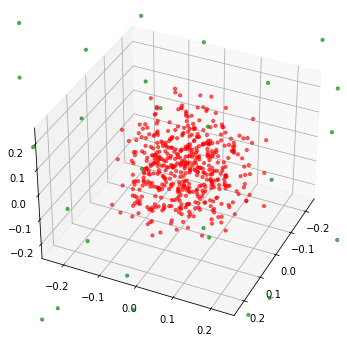

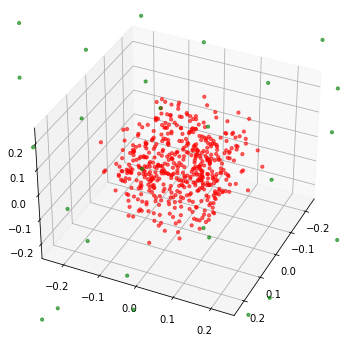

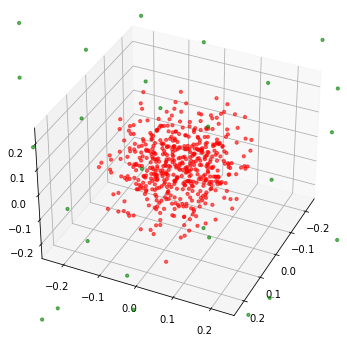

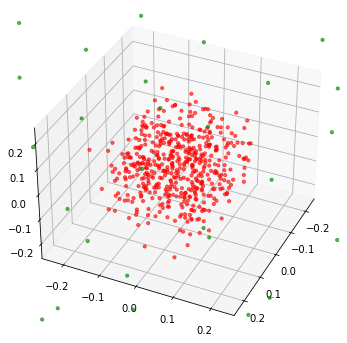

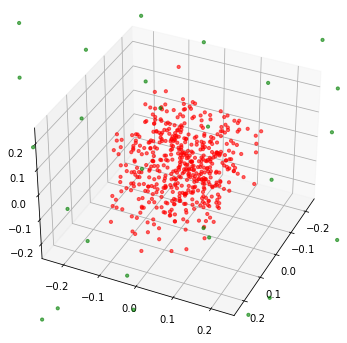

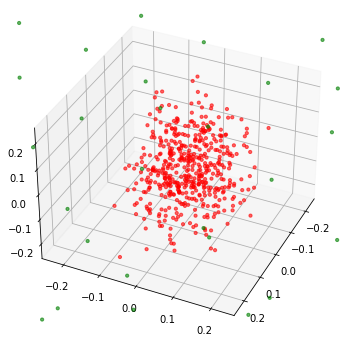

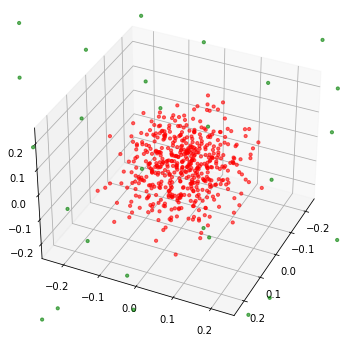

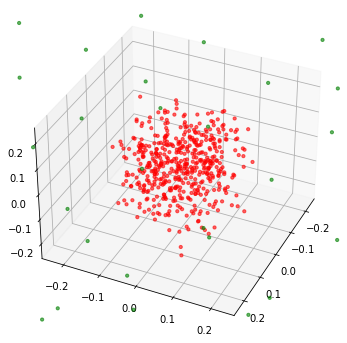

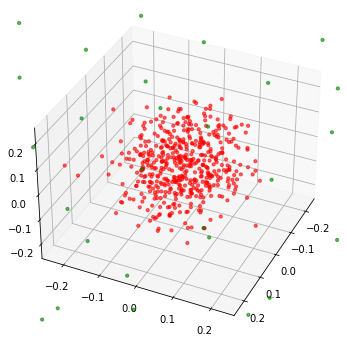

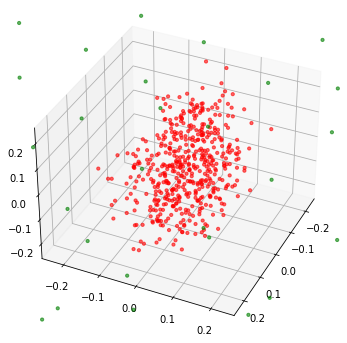

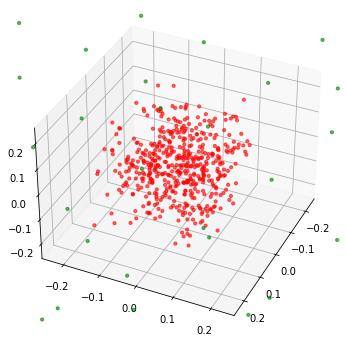

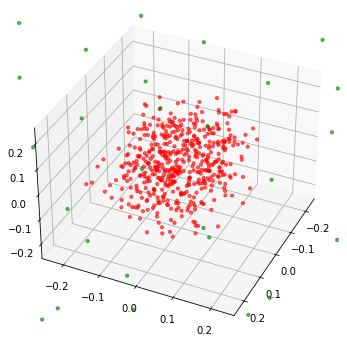

In [135]:

# p0 = np.reshape(ot0,(3,500))
# p1 = np.reshape(gt0,(3,500))
# ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
for i in range(32):
    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(1,1, 0+1, projection='3d')
    p4 = np.reshape(w1[:,i],(3,500))
    ax.scatter(p4[0,:],p4[1,:],p4[2,:], marker='o', s=10, c="r", alpha=0.6)
    # ax.scatter(p[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.scatter(p[0,:],p[1,:],p[2,:], marker='o', s=10, c="g", alpha=0.6)
    ax.view_init(elev=35, azim=25)
    ax_lim = 5*vox2mm
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    plt.show()